In [132]:
path = 'https://raw.githubusercontent.com/LunusMax/football-data/refs/heads/main/Brasileirao/Palmeiras/roque-lopez.csv'

In [133]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from matplotlib import cm
from matplotlib.colors import ListedColormap
from math import pi
from matplotlib.transforms import offset_copy
import matplotlib.patches as patches

In [134]:
data = pd.read_csv(path, sep=';')

In [135]:
data.head()

,Jogador,Minutos,G-PK,Ast,npxG,xAG,Sh,Dist,PrgR,PrgC,PrgP,SCA,GCA,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,Aerial Duels Won,Aerial Duels Lost
0,Vitor Roque,1902,15,3,11.5,2.6,73,15.3,144,54,31,86,7,2,24,178,412,128,17,54
1,Jose Lopez,1657,8,2,8.8,2.1,75,17.5,81,43,55,53,9,16,49,303,342,105,80,76


In [136]:
# Cria uma cópia pra não perder os valores originais
data_90 = data.copy()

# Lista de colunas a normalizar
cols_to_norm = [
    "G-PK", "Ast", "npxG", "xAG", "Sh", "PrgR", "PrgC", "PrgP", "SCA",
    "Att Pen", "Aerial Duels Won", "Aerial Duels Lost",
    "Def Pen", "Def 3rd", "Mid 3rd", "Att 3rd", "GCA"
]

# Normaliza (valor / minutos * 90)
for col in cols_to_norm:
    data_90[col] = data_90[col] / data_90["Minutos"] * 90

In [137]:
data_90.head()

,Jogador,Minutos,G-PK,Ast,npxG,xAG,Sh,Dist,PrgR,PrgC,PrgP,SCA,GCA,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,Aerial Duels Won,Aerial Duels Lost
0,Vitor Roque,1902,0.709779,0.141956,0.544164,0.123028,3.454259,15.3,6.813880,2.555205,1.466877,4.069401,0.331230,0.094637,1.135647,8.422713,19.495268,6.056782,0.804416,2.555205
1,Jose Lopez,1657,0.434520,0.108630,0.477972,0.114062,4.073627,17.5,4.399517,2.335546,2.987326,2.878696,0.488835,0.869040,2.661436,16.457453,18.575739,5.703078,4.345202,4.127942


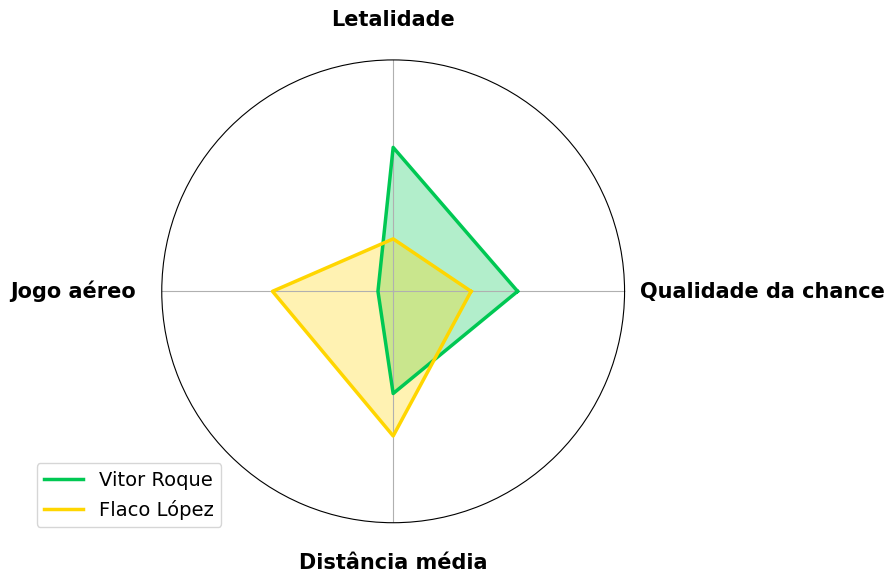

In [138]:
# Cálculo das métricas necessárias
data_90["npxG_per_Shot"] = data_90["npxG"] / data_90["Sh"]
data_90["Conversion_%"] = (data_90["G-PK"] / data_90["Sh"]) * 100
data_90["Aerial_Success_%"] = (data_90["Aerial Duels Won"] /
                               (data_90["Aerial Duels Won"] + data_90["Aerial Duels Lost"])) * 100


cols = ["npxG_per_Shot", "Conversion_%", "Aerial_Success_%", "Dist"]
data_polar = data_90.set_index("Jogador")[cols].copy()

# Escalas fixas
scales = {
    "npxG_per_Shot": (0.05, 0.25),
    "Conversion_%": (5, 30),
    "Aerial_Success_%": (20, 80),
    "Dist": (10, 22)
}

for col, (vmin, vmax) in scales.items():
    data_polar[col] = (data_polar[col] - vmin) / (vmax - vmin)
    data_polar[col] = data_polar[col].clip(0, 1)

data_polar = data_polar.T

categories = ["Qualidade da chance", "Letalidade", "Jogo aéreo", "Distância média"]
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

v_roque = data_polar["Vitor Roque"].tolist() + [data_polar["Vitor Roque"].iloc[0]]
v_flaco = data_polar["Jose Lopez"].tolist() + [data_polar["Jose Lopez"].iloc[0]]

plt.figure(figsize=(9,9))
ax = plt.subplot(111, polar=True)

# Rótulos
plt.xticks(angles[:-1], categories, color='black', size=15, weight='bold')
ax.set_rlabel_position(0)
plt.yticks([], [])
plt.ylim(0,1)

# --- Ajuste manual dos rótulos ---
def mover_label(ax, indice, dx=0, dy=0):
    from matplotlib.transforms import offset_copy
    label = ax.get_xticklabels()[indice]
    trans = offset_copy(label.get_transform(), fig=ax.figure, x=dx, y=dy, units='points')
    label.set_transform(trans)

mover_label(ax, 0, dx=85, dy=0)   # direita
mover_label(ax, 2, dx=-50, dy=0)  # esquerda
mover_label(ax, 1, dy=15)         # cima
mover_label(ax, 3, dy=-15)        # baixo

# Linhas e preenchimento
ax.plot(angles, v_roque, linewidth=2.5, color='#00c853', label='Vitor Roque')
ax.fill(angles, v_roque, color='#00c853', alpha=0.3)
ax.plot(angles, v_flaco, linewidth=2.5, color='#ffd600', label='Flaco López')
ax.fill(angles, v_flaco, color='#ffd600', alpha=0.3)

plt.legend(loc='upper right', bbox_to_anchor=(0.15, 0.15), fontsize=14)
plt.tight_layout()
plt.show()


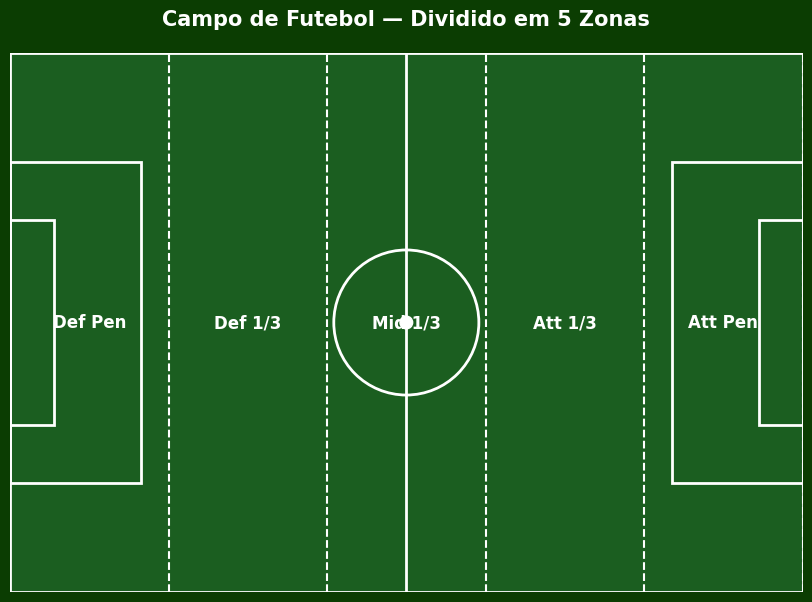

In [139]:
# Configuração da figura
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_xlim(0, 100)
ax.set_ylim(0, 68)
ax.set_aspect('equal')
ax.axis('off')

# Fundo do campo
ax.add_patch(patches.Rectangle((0, 0), 100, 68, linewidth=2, edgecolor='white', facecolor='#1B5E20'))

# Linhas de campo principais
ax.plot([50, 50], [0, 68], color='white', linewidth=2)  # linha do meio
ax.add_patch(patches.Circle((50, 34), 9.15, edgecolor='white', facecolor='none', linewidth=2))  # círculo central
ax.add_patch(patches.Circle((50, 34), 0.8, edgecolor='white', facecolor='white'))  # bola do meio

# Áreas (simples)
# Área esquerda
ax.add_patch(patches.Rectangle((0, 21.1), 5.5, 25.8, edgecolor='white', facecolor='none', linewidth=2))
ax.add_patch(patches.Rectangle((0, 13.8), 16.5, 40.4, edgecolor='white', facecolor='none', linewidth=2))
# Área direita
ax.add_patch(patches.Rectangle((94.5, 21.1), 5.5, 25.8, edgecolor='white', facecolor='none', linewidth=2))
ax.add_patch(patches.Rectangle((83.5, 13.8), 16.5, 40.4, edgecolor='white', facecolor='none', linewidth=2))

# Divide o campo em 5 zonas horizontais
zones = ["Def Pen", "Def 1/3", "Mid 1/3", "Att 1/3", "Att Pen"]
zone_width = 100 / len(zones)

for i, zone in enumerate(zones):
    # Linha divisória
    x = i * zone_width
    ax.plot([x, x], [0, 68], color='white', linewidth=1.5, linestyle='--')
    # Nome da zona
    ax.text(x + zone_width/2, 34, zone, ha='center', va='center',
            color='white', fontsize=12, weight='bold')

# Última linha de divisão
ax.plot([100, 100], [0, 68], color='white', linewidth=1.5, linestyle='--')

plt.title("Campo de Futebol — Dividido em 5 Zonas", fontsize=15, color='white', weight='bold', pad=20)
fig.patch.set_facecolor('#0B3D02')  # fundo externo verde escuro
plt.show()

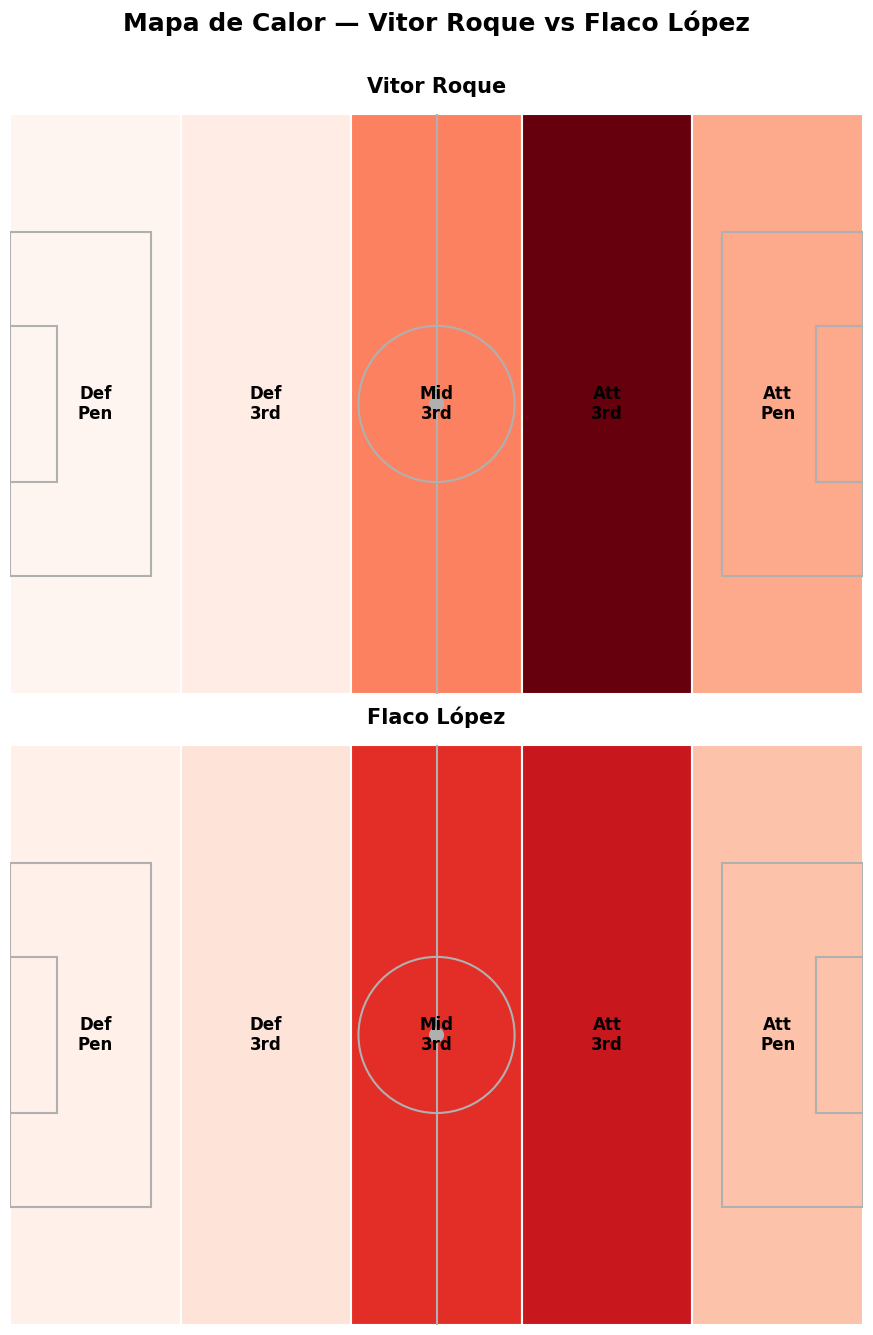

In [140]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# --- Configuração dos dados ---
zones = ["Def Pen", "Def 3rd", "Mid 3rd", "Att 3rd", "Att Pen"]
data_zones = data_90.set_index("Jogador")[zones].copy()
data_zones = data_zones.div(data_zones.sum(axis=1), axis=0)

# Escala global fixa
vmin = data_zones.min().min()
vmax = data_zones.max().max()

players = ["Vitor Roque", "Jose Lopez"]
titles = ["Vitor Roque", "Flaco López"]
cmap = plt.cm.Reds

# --- Função para desenhar o campo ---
def draw_field(ax, values, player_name):
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 68)
    ax.set_aspect('equal')
    ax.axis('off')

    # Fundo branco
    ax.add_patch(patches.Rectangle((0, 0), 100, 68, facecolor='white', edgecolor='none'))

    # Zonas coloridas
    zone_width = 100 / len(zones)
    for i, val in enumerate(values):
        color = cmap((val - vmin) / (vmax - vmin))
        ax.add_patch(
            patches.Rectangle(
                (i * zone_width, 0), zone_width, 68,
                facecolor=color, edgecolor='white', lw=1.5
            )
        )
        ax.text((i + 0.5) * zone_width, 34, zones[i].replace(" ", "\n"),
                ha='center', va='center', fontsize=12, color='black', weight='bold')

    # Linhas principais do campo
    line_color = '#B0B0B0'
    ax.plot([50, 50], [0, 68], color=line_color, linewidth=1.5)
    ax.add_patch(patches.Circle((50, 34), 9.15, edgecolor=line_color, facecolor='none', linewidth=1.5))
    ax.add_patch(patches.Circle((50, 34), 0.8, edgecolor=line_color, facecolor=line_color))
    ax.add_patch(patches.Rectangle((0, 13.8), 16.5, 40.4, edgecolor=line_color, facecolor='none', linewidth=1.5))
    ax.add_patch(patches.Rectangle((83.5, 13.8), 16.5, 40.4, edgecolor=line_color, facecolor='none', linewidth=1.5))
    ax.add_patch(patches.Rectangle((0, 24.9), 5.5, 18.2, edgecolor=line_color, facecolor='none', linewidth=1.5))
    ax.add_patch(patches.Rectangle((94.5, 24.9), 5.5, 18.2, edgecolor=line_color, facecolor='none', linewidth=1.5))

    # Nome do jogador
    ax.text(50, 70, player_name, ha='center', va='bottom', fontsize=15, color='black', weight='bold')

# --- Criação da figura ---
fig, axes = plt.subplots(2, 1, figsize=(12, 14))
for ax, player, title in zip(axes, players, titles):
    values = data_zones.loc[player].values
    draw_field(ax, values, title)

plt.suptitle("Mapa de Calor — Vitor Roque vs Flaco López", fontsize=18, color='black', weight='bold', y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()


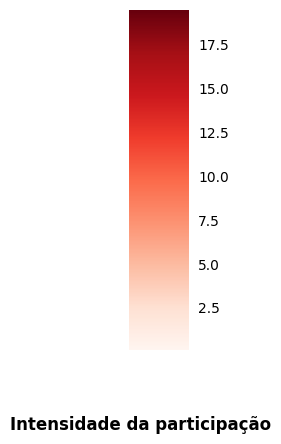

In [141]:
import matplotlib.pyplot as plt
import numpy as np

# --- Mesmos parâmetros usados nos mapas ---
cmap = plt.cm.Reds
vmin = data_90[["Def Pen", "Def 3rd", "Mid 3rd", "Att 3rd", "Att Pen"]].min().min()
vmax = data_90[["Def Pen", "Def 3rd", "Mid 3rd", "Att 3rd", "Att Pen"]].max().max()

# --- Criação da figura ---
fig, ax = plt.subplots(figsize=(1.2, 5))
fig.subplots_adjust(left=0.4, bottom=0.2)  # espaço pro texto embaixo

# Normalização e barra
norm = plt.Normalize(vmin=vmin, vmax=vmax)
cb = plt.colorbar(
    plt.cm.ScalarMappable(norm=norm, cmap=cmap),
    cax=ax,
    orientation='vertical'
)

# Estilo visual
cb.ax.tick_params(labelsize=10, colors='black', width=0)
cb.outline.set_visible(False)

# Adiciona o texto manualmente na parte inferior
fig.text(
    0.5, 0.05,  # posição (x, y)
    "Intensidade da participação",
    ha='center', va='center',
    fontsize=12, color='black', weight='bold'
)

plt.show()

In [146]:
gols = 'https://raw.githubusercontent.com/LunusMax/football-data/refs/heads/main/Brasileirao/Palmeiras/gols_marcados.csv'

In [147]:
dupla = pd.read_csv(gols, sep=';')

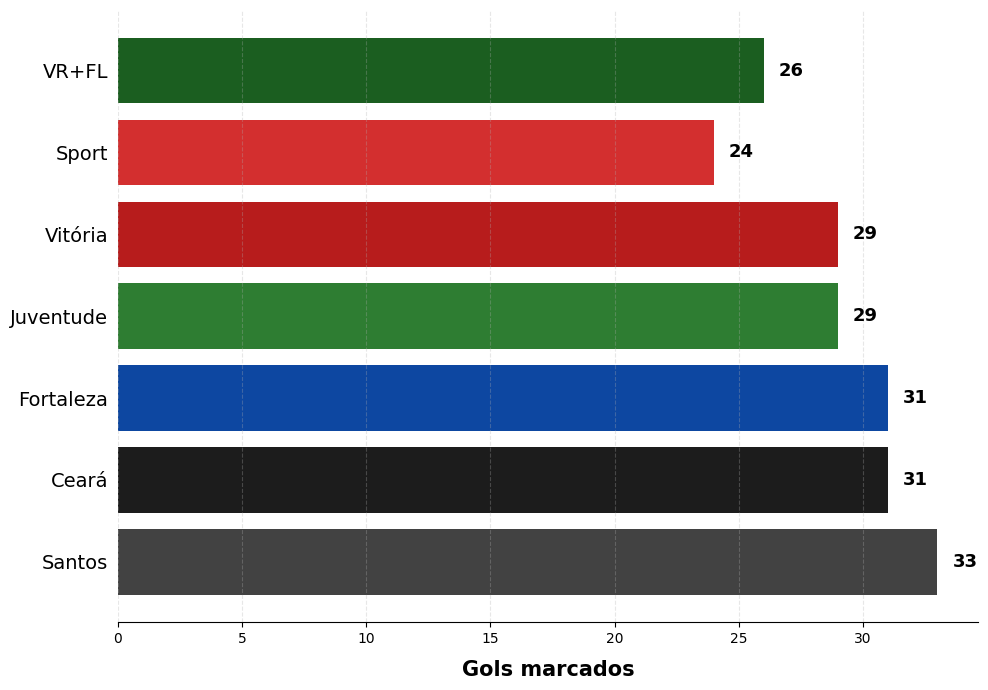

In [155]:
# --- Ordenar ---
dupla = dupla.sort_values(by="Gols", ascending=True).reset_index(drop=True)

# --- Selecionar times até o Atlético-MG e incluir VR+FL ---
subset = dupla.loc[dupla["Time"].isin(
    ["Sport", "Juventude", "Vitória", "Fortaleza", "Ceará", "Santos", "Atlético-MG"]
)]
dupla_vrfl = dupla[dupla["Time"].str.contains("VR", case=False)]
subset = pd.concat([dupla_vrfl, subset], ignore_index=True)  # coloca VR+FL no topo

# --- Cores ---
team_colors = {
    "Sport": "#d32f2f",
    "Vitória": "#b71c1c",
    "Ceará": "#1C1C1C",
    "Fortaleza": "#0d47a1",
    "Santos": "#424242",        # cinza escuro
    "Atlético-MG": "#000000",
    "Juventude": "#2E7D32",
    "VR+FL": "#1B5E20"          # verde Palmeiras
}
colors = [team_colors.get(t, "#bdbdbd") for t in subset["Time"]]

# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.barh(subset["Time"], subset["Gols"], color=colors)
ax.invert_yaxis()

# --- Rótulos dos valores ---
for i, (team, val) in enumerate(zip(subset["Time"], subset["Gols"])):
    ax.text(val + 0.6, i, str(val),
            va="center", fontsize=13, color="black", weight="bold")

# --- Estilo visual ---
ax.set_xlabel("Gols marcados", fontsize=15, labelpad=10, weight="bold")
ax.tick_params(axis="y", labelsize=14, width=0)
ax.grid(axis="x", linestyle="--", alpha=0.3)

# Remove bordas
for spine in ["top", "right", "left"]:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()